# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizky Fauzi
- **Email:** rizky.fauzi2202@gmail.com
- **ID Dicoding:** rizkyfauzi2202

## Menentukan Pertanyaan Bisnis

- Apa saja keadaan yang mempengaruhi user menyewa sepeda ?
- Apakah weekday atau weekend mempegaruhi penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [63]:
#melakukan import package yang akan digunakan pada proyek in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Gathering Data

In [64]:
#karena menggunakan google drive untuk menyimpan dataset maka disini data tersebut dipanggil dan disimpan menggunakan variable day_df yang kemudian ditampilkan menggunakan .head()
day_df = pd.read_csv('/content/drive/My Drive/bike_sharing_dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
#karena menggunakan google drive untuk menyimpan dataset maka disini data tersebut dipanggil dan disimpan menggunakan variable hour_df yang kemudian ditampilkan menggunakan .head()
hour_df = pd.read_csv('/content/drive/My Drive/bike_sharing_dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
#untuk memudahkan pembacaan maka kedua dataset tersebut digabungkan menggunakan left join berdasarkan dteday kemudian disimpan dalam variabel share_df dan ditampilkan menggunakan .head()
share_df = share_df = pd.merge(hour_df, day_df, on='dteday', how='left', suffixes=('_hour', '_day'))
share_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**


### Assessing Data

In [67]:
#menampilkan tipe file dalam kolom share_df
share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [68]:
#melakukan pengecekan apakah terdapat data yang kosong menggunakan fungsi .isna() kemudian di rangkum hasilnya dengan .sum()
share_df.isna().sum()

,0
instant_hour,0
dteday,0
season_hour,0
yr_hour,0
mnth_hour,0
hr,0
holiday_hour,0
weekday_hour,0
workingday_hour,0
weathersit_hour,0


In [69]:
#melakuan pengecekan data yang duplikat dengan fungsi .duplicated()
print("Jumlah duplikasi: ", share_df.duplicated().sum())

Jumlah duplikasi:  0


In [70]:
#merangkum isi dataframe secara numerik
share_df.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [71]:
#mengubah tipedata dteday dari object ke dalam datetime kemudian ditampilkan
share_df['dteday'] = pd.to_datetime(share_df['dteday'])
share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [72]:
#membulatkan isi yang awalnya memiliki 6 angka di belakang koma menjadi 2, kemudian ditampilkan
share_df['temp_day'] = share_df['temp_day'].round(2)
share_df['atemp_day'] = share_df['atemp_day'].round(2)
share_df['hum_day'] = share_df['hum_day'].round(2)
share_df['windspeed_day'] = share_df['windspeed_day'].round(2)
share_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985


In [73]:
#membulatkan isi yang awalnya memiliki 6 angka di belakang koma menjadi 2, kemudian ditampilkan
share_df['atemp_hour'] = share_df['atemp_hour'].round(2)
share_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985


In [74]:
#menampilkan hasil ubahan sebelumnya
share_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.34,0.36,0.81,0.16,331,654,985


**Insight:**
- Dataset ini bisa dibilang bersih karena tidak ada duplikasi data dan tidak ada data yang kosong

- Setelah dilakukan pengecekan, terdapat tipe data yang salah untuk dteday dimana menggunakan object yang seharusnya menggunakan datetime

- Data temp_day, atemp_day, hum_day, windspeed_day pada day_df memiliki 6 angka dibelakang koma, dimana bisa diperpendek menjadi 2 angka di belakang koma untuk mempermudah pembacaan

- Data atemp pada hour_df memiliki 4 angka dibelakang koma, dimana bisa diperpendek menjadi 2 angka di belakang koma untuk mempermudah pembacaan

- Karena sebelumnya terdapat kesalahan pada tipedata dteday(object), maka disini diubah ke dteday(datetime)

- Karena terdapat beberapa kolom yang berisi data terlalu panjang, maka pada share.df data tersebut dibulatkan hingga menjadi 2 angka terakhir saja untuk mempermudah pembacaan

### Cleaning Data

**Insight:**
- pada bike sharing dataset ini tidak terdapat kesalahan pada data baik secara data duplikat atau data kosong

## Exploratory Data Analysis (EDA)

### Explore ...

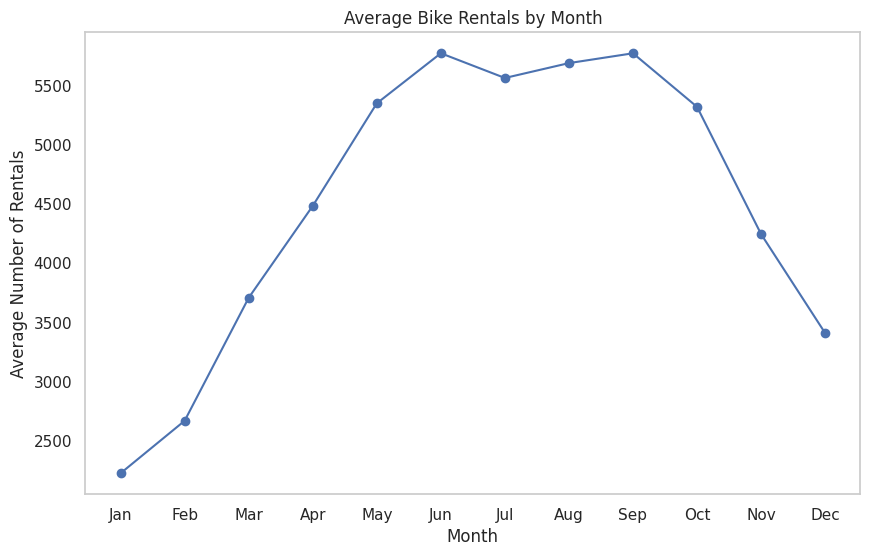

In [75]:
#Kode ini menghitung dan memvisualisasikan rata-rata penyewaan sepeda per bulan dari dataset share_df, dengan bulan di sumbu x dan rata-rata penyewaan di sumbu y.
avg_rentals_per_month = share_df.groupby(share_df['dteday'].dt.month)['cnt_day'].mean()

plt.figure(figsize=(10, 6))
avg_rentals_per_month.plot(marker='o')
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month labels
plt.grid()
plt.show()

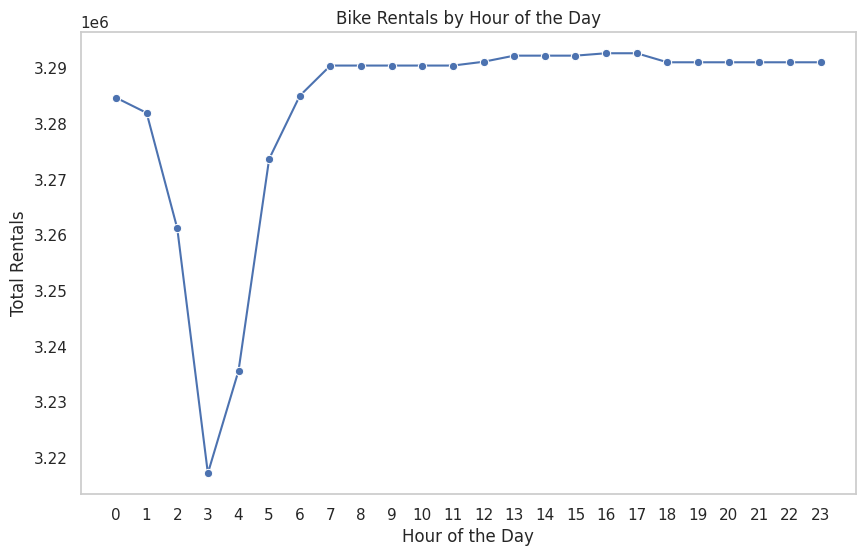

In [76]:
#Kode ini menghitung total penyewaan sepeda per jam dan mencari jam dengan penyewaan tertinggi. Selanjutnya, kode ini memvisualisasikan data dalam plot garis, menampilkan total penyewaan berdasarkan jam.
hourly_rentals = share_df.groupby('hr')['cnt_day'].sum().reset_index()

peak_hour = hourly_rentals[hourly_rentals['cnt_day'] == hourly_rentals['cnt_day'].max()]

plt.figure(figsize=(10, 6))

sns.lineplot(x='hr', y='cnt_day', data=hourly_rentals, marker='o')

plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')

plt.xticks(range(24))

plt.grid()

plt.show()


**Insight:**
- data rata rata peminjaman per bulan menunjukan bahwa count paling tinggi terjadi pada bulan juni hingga september dimana bulan bulan tersebut merupakan musim panas hingga gugur.

- sementara data berdasarkan jam dalam perhari menunjukan bahwa sepeda banyak digunakan dari pukul 7 pagi hingga 11 malam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja keadaan yang mempengaruhi user menyewa sepeda ?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


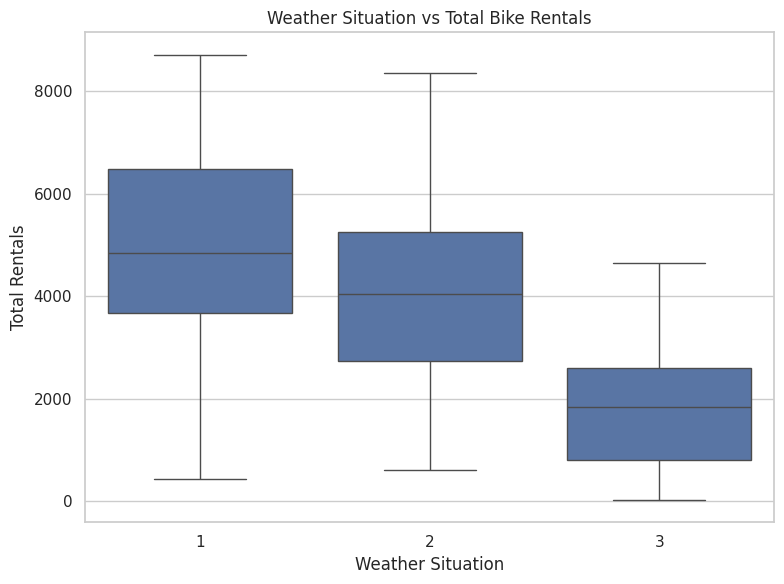

In [77]:
#Kode ini membuat boxplot untuk menganalisis pengaruh situasi cuaca terhadap total penyewaan sepeda. Visualisasi ini membantu mengidentifikasi distribusi dan outlier dalam data penyewaan berdasarkan kategori cuaca.
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='weathersit_day', y='cnt_day', data=share_df, ax=ax)

ax.set_title('Weather Situation vs Total Bike Rentals')
ax.set_xlabel('Weather Situation')
ax.set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

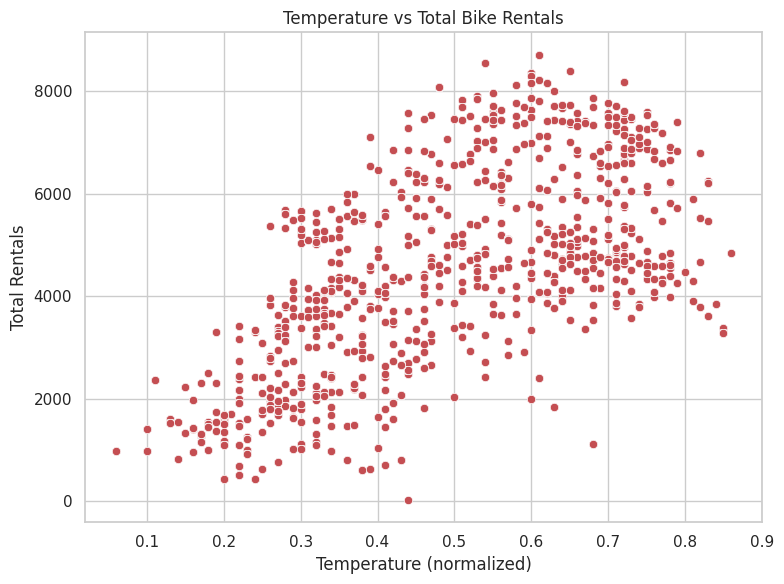

In [78]:
#Kode ini membuat scatter plot untuk menunjukkan hubungan antara suhu dan total penyewaan sepeda untuk membantu menganalisis dampak suhu terhadap penyewaan sepeda.
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='temp_day', y='cnt_day', data=share_df, ax=ax, color='r')
ax.set_title('Temperature vs Total Bike Rentals')
ax.set_xlabel('Temperature (normalized)')
ax.set_ylabel('Total Rentals')
plt.tight_layout()
plt.show()

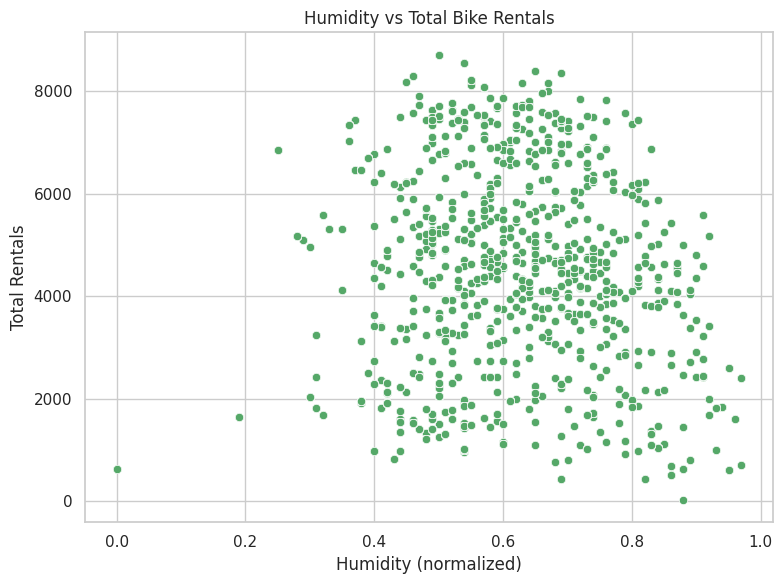

In [79]:
#Kode ini membuat scatter plot yang menunjukkan hubungan antara kelembaban dan total penyewaan sepeda untuk menganalisis pengaruh kelembaban terhadap penggunaan sepeda.
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='hum_day', y='cnt_day', data=share_df, ax=ax, color='g')

ax.set_title('Humidity vs Total Bike Rentals')
ax.set_xlabel('Humidity (normalized)')
ax.set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()


### Pertanyaan 2: Apakah weekday atau weekend mempegaruhi penyewaan sepeda ?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


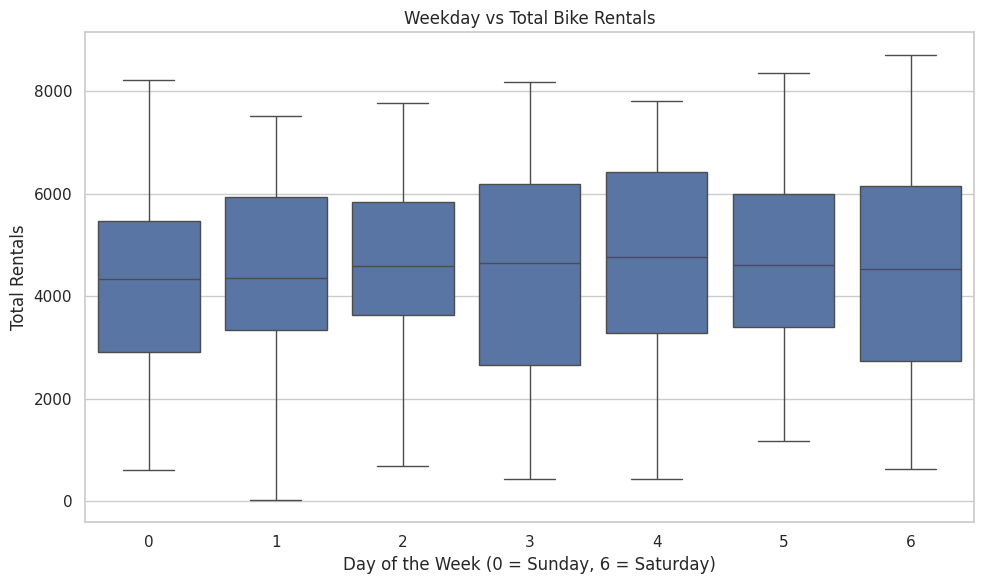

In [80]:
#Kode ini menghasilkan boxplot untuk menganalisis perbandingan total penyewaan sepeda berdasarkan hari dalam seminggu.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(x='weekday_hour', y='cnt_day', data=share_df)
plt.title('Weekday vs Total Bike Rentals')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan dataset, dihasilkan bahwa eather 1 merupakan keadaan cuaca yang paling tinggi peminat dalam bike sharing ini. begitu juga dengan temperatur, dimana 0.6 merupakan temperatur yang paling disukai untuk bike sharing. sama halnya dengan humidity, dimana 0.6 merupakan humidity yang paling disukai untuk user.

- Data penggunaan harian antara hari kerja (workday) dan akhir pekan (weekday) menunjukkan perbedaan hasil yang tidak terlalu signifikan. Hal ini menunjukkan bahwa minat dalam penggunaan sepeda harian tidak menghasilkan perbedaan yang mencolok

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Hasil visualisasi data menunjukkan bahwa terdapat jenis cuaca 1 yang lebih diminati dalam layanan bike sharing. Selain itu, faktor temperatur dan kelembapan (humidity) yang berada pada angka 0.4 hingga 0.8 pada hari-hari tersebut juga berpengaruh, yang membuat pengguna lebih cenderung memilih untuk menggunakan sepeda. Hal ini mengindikasikan bahwa kondisi cuaca, suhu, dan kelembapan dapat mempengaruhi keputusan pengguna dalam melakukan bike sharing

- Conclution pertanyaan 2
Hasil boxplot yang membandingkan penggunaan sepeda berdasarkan hari menunjukkan bahwa penggunaan sepeda pada hari minggu (weekday) mengalami penurunan, meskipun tidak signifikan. Di sisi lain, penggunaan sepeda pada hari kerja (workday) cenderung lebih tinggi dibandingkan dengan hari minggu, terutama pada hari Rabu, Kamis, dan Sabtu. Temuan ini mengindikasikan bahwa aktivitas bike sharing lebih diminati pada hari kerja, kemungkinan karena lebih banyak pengguna yang memanfaatkan sepeda untuk keperluan mobilitas sehari-hari.